In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN

In [2]:
import glob
import os

folder_path = r"C:\Users\91916\Desktop\VARUN\python_guvi\guvi\Datasets\Flat_resale_data"
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

dfs = [pd.read_csv(file) for file in csv_files]
combined_data = pd.concat(dfs, ignore_index=True)

# Process the combined_data dataframe as needed
combined_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
930268,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,838000.0,63 years 03 months
930269,2024-07,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62 years 03 months
930270,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63 years 01 month
930271,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60 years 03 months


In [3]:
df = combined_data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930273 entries, 0 to 930272
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930273 non-null  object 
 1   town                 930273 non-null  object 
 2   flat_type            930273 non-null  object 
 3   block                930273 non-null  object 
 4   street_name          930273 non-null  object 
 5   storey_range         930273 non-null  object 
 6   floor_area_sqm       930273 non-null  float64
 7   flat_model           930273 non-null  object 
 8   lease_commence_date  930273 non-null  int64  
 9   resale_price         930273 non-null  float64
 10  remaining_lease      221223 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.1+ MB


In [5]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [7]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [8]:
df['block'].unique()

array(['309', '216', '211', ..., '240A', '460D', '83A'], dtype=object)

In [9]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [10]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [11]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [12]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [13]:
#Equation for the lease period in singapore i.e., 99 years will be added from the lease commence year
remaining_lease = (df['lease_commence_date'] + 99) - 2024

In [14]:
df['remaining_lease'] = df['remaining_lease'].fillna(remaining_lease)

In [15]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,52
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,52
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,52
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,52
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,51
...,...,...,...,...,...,...,...,...,...,...,...
930268,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,838000.0,63 years 03 months
930269,2024-07,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62 years 03 months
930270,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63 years 01 month
930271,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60 years 03 months


In [16]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [17]:
df['remaining_lease'].unique()

array([52, 51, 53, 54, 59, 55, 60, 56, 57, 61, 47, 58, 48, 44, 50, 46, 49,
       42, 45, 43, 63, 62, 64, 65, 67, 68, 69, 66, 70, 71, 72, 73, 74, 75,
       76, 41, 77, 81, 78, 80, 79, 83, 82, 84, 85, 87, 86, 90, 94, 88, 89,
       93, 92, 91, 95, 96, 97, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
 

In [18]:
df1 = df.copy()

In [19]:
# Function to convert values to integers
def convert_to_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return np.nan  # or any default value you prefer, e.g., 0

# Apply conversion function
df1['remaining_lease'] = df1['remaining_lease'].apply(convert_to_int)

In [20]:
df1['remaining_lease'].unique()

array([52., 51., 53., 54., 59., 55., 60., 56., 57., 61., 47., 58., 48.,
       44., 50., 46., 49., 42., 45., 43., 63., 62., 64., 65., 67., 68.,
       69., 66., 70., 71., 72., 73., 74., 75., 76., 41., 77., 81., 78.,
       80., 79., 83., 82., 84., 85., 87., 86., 90., 94., 88., 89., 93.,
       92., 91., 95., 96., 97., nan])

In [21]:
df1.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        184070
dtype: int64

In [22]:
df1['remaining_lease'] = df1['remaining_lease'].fillna(remaining_lease)

In [23]:
df1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [24]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,52.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,52.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,52.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,52.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...
930268,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,838000.0,63.0
930269,2024-07,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62.0
930270,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.0
930271,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.0


In [25]:
df2 = df1.copy()

In [26]:
df2['month'] = pd.to_datetime(df2['month'].astype(str), format='%Y-%m', errors='coerce')
# Extract year and month into separate columns
df2['Year'] = df2['month'].dt.year
df2['Month'] = df2['month'].dt.month

In [27]:
df2.drop('month', axis=1, inplace=True)

In [28]:
df3 = df2.copy()
df3

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,52.0,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,52.0,1990,1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,52.0,1990,1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,52.0,1990,1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,51.0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
930268,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,838000.0,63.0,2024,7
930269,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62.0,2024,7
930270,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.0,2024,7
930271,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.0,2024,7


In [29]:
df3['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [30]:
mapping = {'ANG MO KIO':0, 'BEDOK':1, 'BISHAN':2, 'BUKIT BATOK':3, 'BUKIT MERAH':4,
       'BUKIT TIMAH':5, 'CENTRAL AREA':6, 'CHOA CHU KANG':7, 'CLEMENTI':8,
       'GEYLANG':9, 'HOUGANG':10, 'JURONG EAST':11, 'JURONG WEST':12,
       'KALLANG/WHAMPOA':13, 'MARINE PARADE':14, 'QUEENSTOWN':15, 'SENGKANG':16,
       'SERANGOON':17, 'TAMPINES':18, 'TOA PAYOH':19, 'WOODLANDS':20, 'YISHUN':21,
       'LIM CHU KANG':22, 'SEMBAWANG':23, 'BUKIT PANJANG':24, 'PASIR RIS':25,
       'PUNGGOL':26}
df3.replace({'town': mapping}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_19932\904822227.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace({'town': mapping}, inplace=True)


In [31]:
df3['town'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [32]:
df3['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [33]:
mapping_1 = {'1 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3, '2 ROOM':4, 'EXECUTIVE':5,
       'MULTI GENERATION':6, 'MULTI-GENERATION':7}
df3.replace({'flat_type': mapping_1}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_19932\947053539.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace({'flat_type': mapping_1}, inplace=True)


In [34]:
df3['flat_type'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [35]:
df3['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [36]:
mapping_2 = {'10 TO 12':0, '04 TO 06':1, '07 TO 09':2, '01 TO 03':3, '13 TO 15':4,
       '19 TO 21':5, '16 TO 18':6, '25 TO 27':7, '22 TO 24':8, '28 TO 30':9,
       '31 TO 33':10, '40 TO 42':11, '37 TO 39':12, '34 TO 36':13, '06 TO 10':14,
       '01 TO 05':15, '11 TO 15':16, '16 TO 20':17, '21 TO 25':18, '26 TO 30':19,
       '36 TO 40':20, '31 TO 35':21, '46 TO 48':22, '43 TO 45':23, '49 TO 51':24}
df3.replace({'storey_range': mapping_2}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_19932\3578740229.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace({'storey_range': mapping_2}, inplace=True)


In [37]:
df3['storey_range'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [38]:
df3['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [39]:
df3['flat_model'] = df3['flat_model'].str.upper()

In [40]:
df3['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [41]:
mapping_3 = {'IMPROVED':0 , 'NEW GENERATION':1, 'MODEL A':2, 'STANDARD':3, 'SIMPLIFIED':4,
       'MODEL A-MAISONETTE':5, 'APARTMENT':6, 'MAISONETTE':7, 'TERRACE':8,
       '2-ROOM':9, 'IMPROVED-MAISONETTE':10, 'MULTI GENERATION':11,
       'PREMIUM APARTMENT':12, 'ADJOINED FLAT':13, 'PREMIUM MAISONETTE':14,
       'MODEL A2':15, 'DBSS':16, 'TYPE S1':17, 'TYPE S2':18, 'PREMIUM APARTMENT LOFT':19,
       '3GEN':20}
df3.replace({'flat_model': mapping_3}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_19932\705232626.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace({'flat_model': mapping_3}, inplace=True)


In [42]:
df3['flat_model'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930273 entries, 0 to 930272
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 930273 non-null  int64  
 1   flat_type            930273 non-null  int64  
 2   block                930273 non-null  object 
 3   street_name          930273 non-null  object 
 4   storey_range         930273 non-null  int64  
 5   floor_area_sqm       930273 non-null  float64
 6   flat_model           930273 non-null  int64  
 7   lease_commence_date  930273 non-null  int64  
 8   resale_price         930273 non-null  float64
 9   remaining_lease      930273 non-null  float64
 10  Year                 930273 non-null  int32  
 11  Month                930273 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 78.1+ MB


In [44]:
df4 = df3.copy()

In [45]:
df4['block'].unique()

array(['309', '216', '211', ..., '240A', '460D', '83A'], dtype=object)

In [46]:
# Create a dictionary to map categories to numeric labels
category_mapping = {category: index for index, category in enumerate(df4['block'].unique())}

# Apply the mapping to the 'Category' column
df4['block'] = df4['block'].map(category_mapping)

In [47]:
df4['block'].unique()

array([   0,    1,    2, ..., 2709, 2710, 2711], dtype=int64)

In [48]:
df4['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [49]:
# Create a dictionary to map categories to numeric labels
category_mapping_1 = {category: index for index, category in enumerate(df4['street_name'].unique())}

# Apply the mapping to the 'Category' column
df4['street_name'] = df4['street_name'].map(category_mapping_1)

In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930273 entries, 0 to 930272
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 930273 non-null  int64  
 1   flat_type            930273 non-null  int64  
 2   block                930273 non-null  int64  
 3   street_name          930273 non-null  int64  
 4   storey_range         930273 non-null  int64  
 5   floor_area_sqm       930273 non-null  float64
 6   flat_model           930273 non-null  int64  
 7   lease_commence_date  930273 non-null  int64  
 8   resale_price         930273 non-null  float64
 9   remaining_lease      930273 non-null  float64
 10  Year                 930273 non-null  int32  
 11  Month                930273 non-null  int32  
dtypes: float64(3), int32(2), int64(7)
memory usage: 78.1 MB


In [51]:
df5 = df4.copy()

In [52]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930273 entries, 0 to 930272
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 930273 non-null  int64  
 1   flat_type            930273 non-null  int64  
 2   block                930273 non-null  int64  
 3   street_name          930273 non-null  int64  
 4   storey_range         930273 non-null  int64  
 5   floor_area_sqm       930273 non-null  float64
 6   flat_model           930273 non-null  int64  
 7   lease_commence_date  930273 non-null  int64  
 8   resale_price         930273 non-null  float64
 9   remaining_lease      930273 non-null  float64
 10  Year                 930273 non-null  int32  
 11  Month                930273 non-null  int32  
dtypes: float64(3), int32(2), int64(7)
memory usage: 78.1 MB


In [53]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

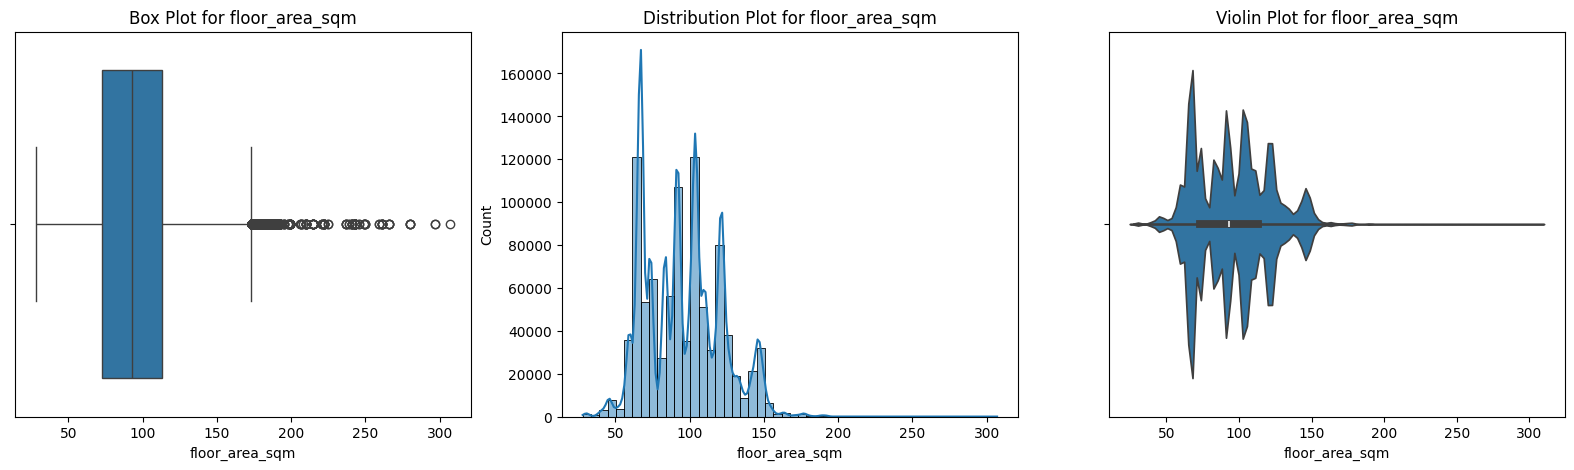

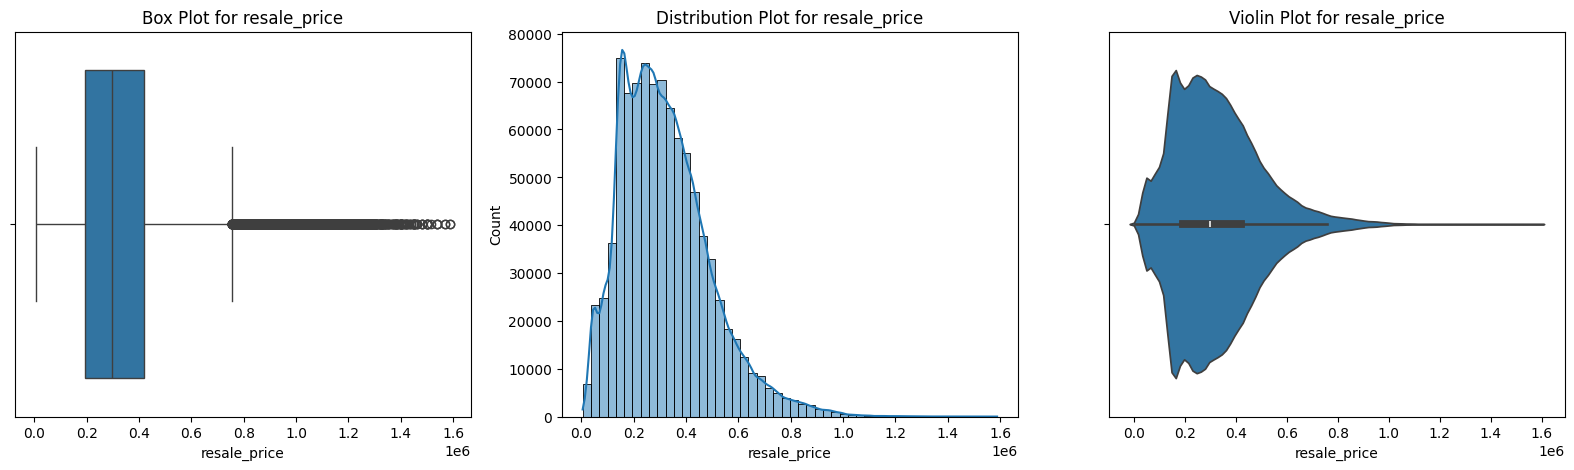

In [54]:
for i in ['floor_area_sqm','resale_price']:
    plot(df5, i)

In [55]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)


In [56]:
outlier(df5,'floor_area_sqm')
outlier(df5,'resale_price')

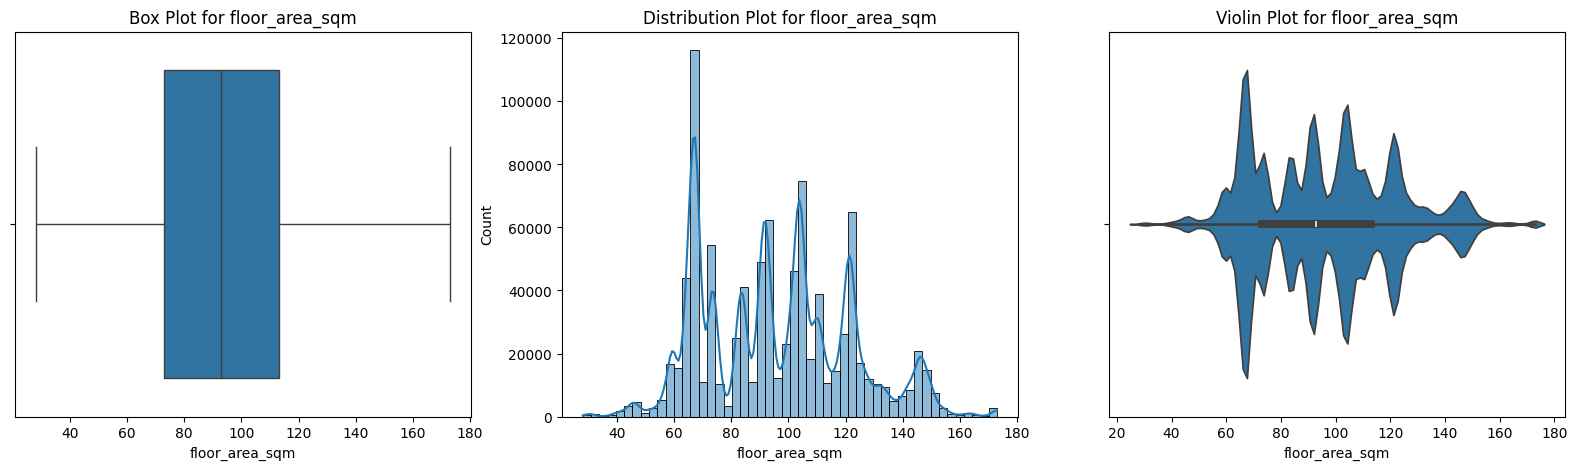

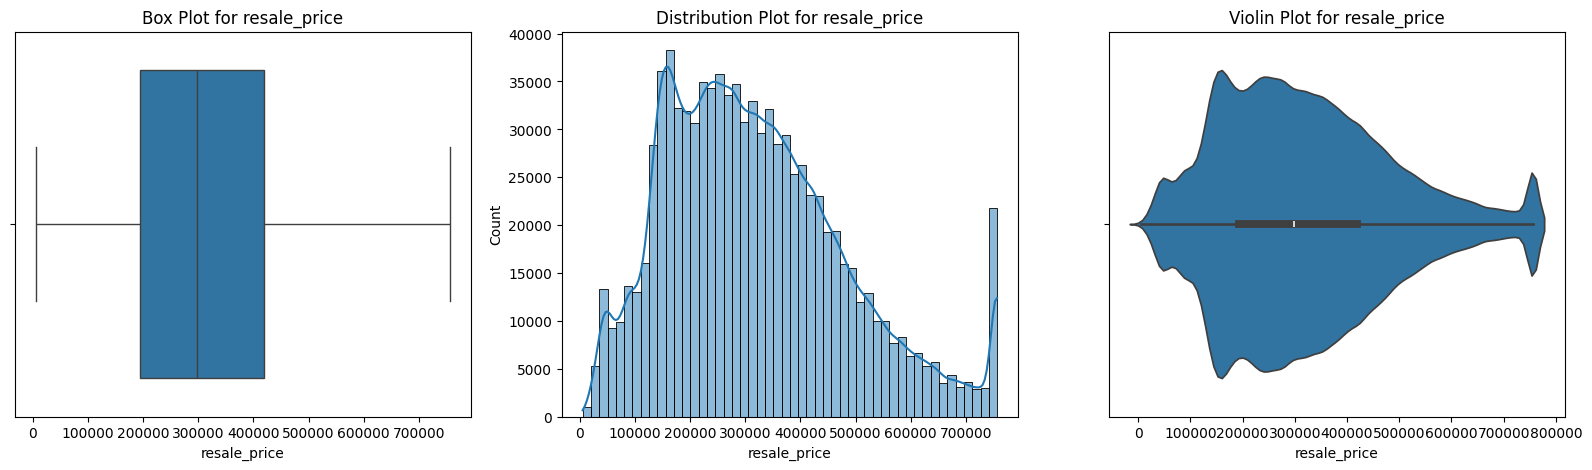

In [57]:
for i in ['floor_area_sqm','resale_price']:
    plot(df5, i)

In [58]:
df5.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,0,0,0,0,0,31.0,0,1977,9000.0,52.0,1990,1
1,0,0,0,0,1,31.0,0,1977,6000.0,52.0,1990,1
2,0,0,0,0,0,31.0,0,1977,8000.0,52.0,1990,1
3,0,0,0,0,2,31.0,0,1977,6000.0,52.0,1990,1
4,0,1,1,0,1,73.0,1,1976,47200.0,51.0,1990,1


<Axes: >

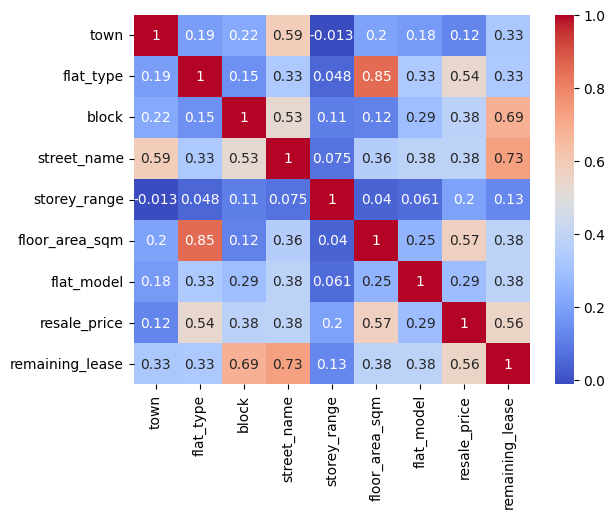

In [94]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','resale_price','remaining_lease']
corr_matrix = df5[col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [95]:
# Find features with correlation greater than 0.65
high_corr = np.where(corr_matrix > 0.65)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

print("Highly Correlated Feature Pairs (correlation > 0.65):")
print(high_corr_pairs)

Highly Correlated Feature Pairs (correlation > 0.65):
[('flat_type', 'floor_area_sqm'), ('block', 'remaining_lease'), ('street_name', 'remaining_lease')]


In [62]:
# Removing one of the highly correlated features as the flat type depends on floor_area_sqm and street name does not impact the price prediction
features_to_remove = set()
for pair in high_corr_pairs:
    features_to_remove.add(pair[0])  # Remove the first feature in each pair

df_reduced = df5.drop(columns=features_to_remove)

print("\nDataFrame after removing highly correlated features:")
df_reduced


DataFrame after removing highly correlated features:


,town,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,0,0,31.0,0,1977,9000.0,52.0,1990,1
1,0,1,31.0,0,1977,6000.0,52.0,1990,1
2,0,0,31.0,0,1977,8000.0,52.0,1990,1
3,0,2,31.0,0,1977,6000.0,52.0,1990,1
4,0,1,73.0,1,1976,47200.0,51.0,1990,1
...,...,...,...,...,...,...,...,...,...
930268,21,0,142.0,6,1988,756500.0,63.0,2024,7
930269,21,2,147.0,6,1987,756500.0,62.0,2024,7
930270,21,1,146.0,7,1988,756500.0,63.0,2024,7
930271,21,3,146.0,7,1985,756500.0,60.0,2024,7


<Axes: >

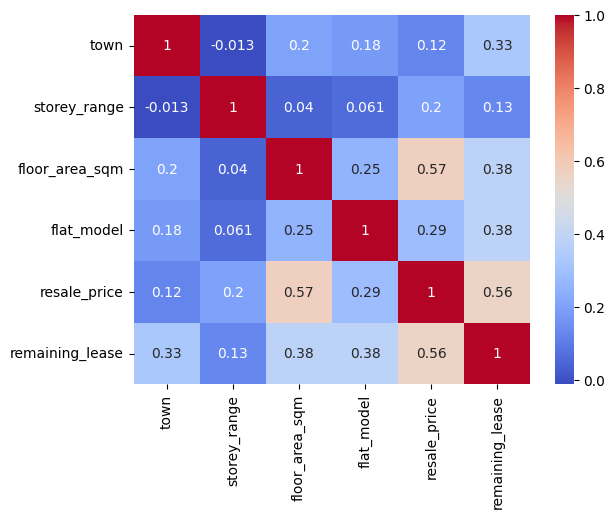

In [63]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['town','storey_range','floor_area_sqm','flat_model','resale_price','remaining_lease']
corr_matrix = df_reduced[col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [64]:
df6 = df_reduced.copy()

In [65]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
from sklearn import metrics

In [66]:
df6.columns

Index(['town', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'remaining_lease', 'Year',
       'Month'],
      dtype='object')

In [67]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    X = df.drop(columns=['resale_price'], axis=1)
    y = df['resale_price']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    model = algorithm().fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [68]:
print(machine_learning_regression(df6, DecisionTreeRegressor))
print(machine_learning_regression(df6, ExtraTreesRegressor))
print(machine_learning_regression(df6, RandomForestRegressor))
print(machine_learning_regression(df6, AdaBoostRegressor))
print(machine_learning_regression(df6, GradientBoostingRegressor))
print(machine_learning_regression(df6, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9982689739043841, 'R2_test': 0.9649753538787265}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9982686865928693, 'R2_test': 0.9769873921880046}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9959098846494036, 'R2_test': 0.9790691771014749}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7319232920781112, 'R2_test': 0.731152306962693}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9222966634069666, 'R2_test': 0.9215269467512369}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9749186004043311, 'R2_test': 0.9743645225349986}


In [69]:
#selecting randomforest regressor

In [ ]:
X = df6.drop(columns=['resale_price'], axis=1)
y = df6['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(X_train, y_train)

In [88]:
# pass the parameters and check the accuracy for both training and testing & overfitting

X = df6.drop(columns=['resale_price'], axis=1)
y = df6['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_1 = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9890390024461574, 0.9792134794530623)

In [89]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

X = df6.drop(columns=['resale_price'], axis=1)
y = df6['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_1 = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
y_pred = model_1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9792372642645125,
 'Mean Absolute Error': 16340.568615042339,
 'Mean Squared Error': 557501321.5347052,
 'Root Mean Squared Error': 23611.465891272088}

In [90]:
# manually passed the user input and predict the selling price

user_data = np.array([[0,0,31.0,0,1977,52.0,1990,1]])
y_pred = model_1.predict(user_data)
y_pred[0]

C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


7348.5

In [91]:
# save the regression model by using pickle

with open('singapore_resale_price_regression_model.pkl', 'wb') as g:
    pickle.dump(model_1, g)

In [92]:
# load the pickle model to predict selling price

with open(r'C:\Users\91916\GUVI_DS\singapore_resale_price_regression_model.pkl', 'rb') as g:
    model_1 = pickle.load(g)

y_pred = model_1.predict(np.array([[0,0,31.0,0,1977,52.0,1990,1]]))
y_pred[0]

C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


7348.5